In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Twitter App access keys for @user
#from credentials import *    # This will allow us to use the keys as variables

####input your credentials here
consumer_key = 'YUVfHLTJcOtjBL792hGLEDca7'
consumer_secret = 'bBFz2wrtwmuGEF6HTuybsAelnLeojyOUCnn9MU5LfRDc3DnsPO'
access_token = '1018280534080827392-h7CltoqTHMCI5789pLLh1tgnEdLViI'
access_token_secret = 'mbm93iG02ZvR1tajYtwaOgLP87GtsEag0DaEUeN93NOgV'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth,wait_on_rate_limit=True)

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

These Russian individuals did their work during the Obama years. Why didn’t Obama do something about it?  Because h… https://t.co/3DnzJPptZD

Our prayers are with those affected by the flooding in Japan. We commend the rescue efforts and offer condolences t… https://t.co/K5Mz1lxkDZ

....Remember, it was Little Jeff Z and his people, who are told exactly what to say, who said I could not win the e… https://t.co/hRmoOWINCB

So funny! I just checked out Fake News CNN, for the first time in a long time (they are dying in the ratings), to s… https://t.co/x98T67WsJJ

The stories you heard about the 12 Russians yesterday took place during the Obama Administration, not the Trump Adm… https://t.co/PAZnAMIP0T



In [5]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,These Russian individuals did their work durin...
1,Our prayers are with those affected by the flo...
2,"....Remember, it was Little Jeff Z and his peo..."
3,"So funny! I just checked out Fake News CNN, fo..."
4,The stories you heard about the 12 Russians ye...
5,"....Where is the DNC Server, and why didn’t th..."
6,"The Stock Market hit 25,000 yesterday. Jobs ar..."
7,I have arrived in Scotland and will be at Trum...
8,This is now changing - for the first time! htt...
9,"RT @realDonaldTrump: ....On top of it all, Ger..."


In [6]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1018197842559725569
2018-07-14 18:17:37
Twitter for iPhone
82008
23669
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/3DnzJPptZD', 'expanded_url': 'https://twitter.com/i/web/status/1018197842559725569', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [8]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,These Russian individuals did their work durin...,140,1018197842559725569,2018-07-14 18:17:37,Twitter for iPhone,82008,23669
1,Our prayers are with those affected by the flo...,140,1018113905716027393,2018-07-14 12:44:05,Twitter for iPhone,51022,12481
2,"....Remember, it was Little Jeff Z and his peo...",140,1018096402520518656,2018-07-14 11:34:32,Twitter for iPhone,68690,14543
3,"So funny! I just checked out Fake News CNN, fo...",140,1018093807060045824,2018-07-14 11:24:13,Twitter for iPhone,74503,17380
4,The stories you heard about the 12 Russians ye...,140,1018074723140427776,2018-07-14 10:08:23,Twitter for iPhone,89961,28401
5,"....Where is the DNC Server, and why didn’t th...",86,1018072081676865536,2018-07-14 09:57:53,Twitter for iPhone,76714,21298
6,"The Stock Market hit 25,000 yesterday. Jobs ar...",140,1018069319702458368,2018-07-14 09:46:55,Twitter for iPhone,87356,19360
7,I have arrived in Scotland and will be at Trum...,139,1018068353305411584,2018-07-14 09:43:04,Twitter for iPhone,70846,13034
8,This is now changing - for the first time! htt...,66,1018062211909083136,2018-07-14 09:18:40,Twitter for iPhone,46532,10295
9,"RT @realDonaldTrump: ....On top of it all, Ger...",140,1018061893750149120,2018-07-14 09:17:24,Twitter for iPhone,0,19583


In [10]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 127.405


In [11]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of likes: 315520
65 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of retweets: 108121
86 characters.



In [12]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

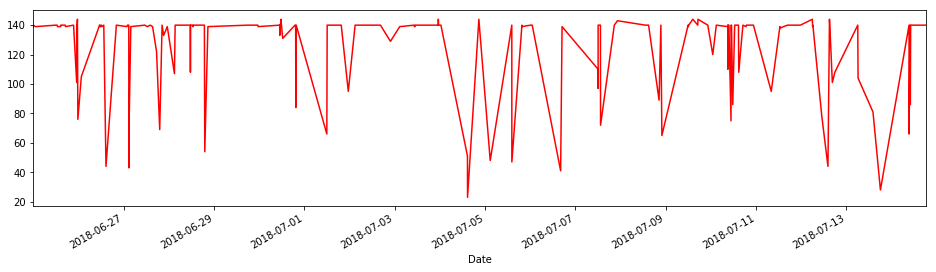

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

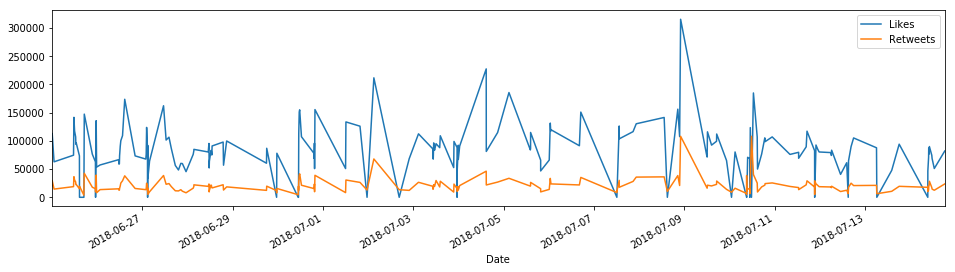

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio


In [17]:
s = set()
s.update(data['Source'])
print(s)

{'Twitter for iPhone', 'Media Studio'}


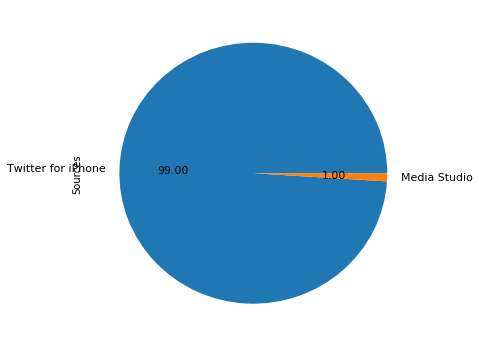

In [19]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [22]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [23]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,These Russian individuals did their work durin...,140,1018197842559725569,2018-07-14 18:17:37,Twitter for iPhone,82008,23669,0
1,Our prayers are with those affected by the flo...,140,1018113905716027393,2018-07-14 12:44:05,Twitter for iPhone,51022,12481,0
2,"....Remember, it was Little Jeff Z and his peo...",140,1018096402520518656,2018-07-14 11:34:32,Twitter for iPhone,68690,14543,-1
3,"So funny! I just checked out Fake News CNN, fo...",140,1018093807060045824,2018-07-14 11:24:13,Twitter for iPhone,74503,17380,-1
4,The stories you heard about the 12 Russians ye...,140,1018074723140427776,2018-07-14 10:08:23,Twitter for iPhone,89961,28401,0
5,"....Where is the DNC Server, and why didn’t th...",86,1018072081676865536,2018-07-14 09:57:53,Twitter for iPhone,76714,21298,0
6,"The Stock Market hit 25,000 yesterday. Jobs ar...",140,1018069319702458368,2018-07-14 09:46:55,Twitter for iPhone,87356,19360,-1
7,I have arrived in Scotland and will be at Trum...,139,1018068353305411584,2018-07-14 09:43:04,Twitter for iPhone,70846,13034,0
8,This is now changing - for the first time! htt...,66,1018062211909083136,2018-07-14 09:18:40,Twitter for iPhone,46532,10295,1
9,"RT @realDonaldTrump: ....On top of it all, Ger...",140,1018061893750149120,2018-07-14 09:17:24,Twitter for iPhone,0,19583,1


In [24]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [26]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 51.0%
Percentage of neutral tweets: 31.0%
Percentage de negative tweets: 18.0%
